In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
sns.set_style("whitegrid")
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (15,10)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fadhinotgr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### get the data

In [3]:
df_damri = pd.read_csv("../data/damri_apps_raw.csv")
df_damri = df_damri[["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_damri.shape

(4945, 7)

### random select data

In [4]:
# random_select
np.random.choice(df_damri['content'], size=10, replace=False)

array(['Lebih cepat & praktis.', 'Nyaman',
       'Sebelum tiket dibayar penjelasan nya gak sesuai dengan pas sdah perjalanan dan cek in Perbaiki lah jgan mengecewakan Harga lebih mahal tapi pelayanan nya kelas bawah Sungguh sangat kecewa.. Tidak ada istrahat juga tidak dapat makan padahal tertulis dapat makan... Tolong ini milik pemerintah jgan dibuat seperti ini... Jakarta malang cuma dapat air mineral dengan harga Rp 720.000 Bilang lewat tol tapi lewat jalur biasa .... Nggak mau rugi jgan kayak gitu dong Mesin Rusak sampai dia kali.. Kecewa',
       'Aplikasi bagus banget', 'Tidak bisa verifikasi akun gmna ini?',
       'baru download suruh diperbarui, gimana lah',
       'Masa setiap buka apk nya minta di perbarui, padahal dri PlayStore aja gada udh ngk bisa diperbarui, Baru download udh ngk bisa dibuka gajelas bgt',
       'knp gk bsa login ? keterangan "tidak ada jaringan" padahal sinyal udh stabil 4G',
       'Untuk damri (INI SERIUS), coba deh liat kondisi Bus kelas royalnya. K

In [5]:
df_damri.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,bug/ keamanan ? aplikasi lama ga di buka ketik...,2,0,4.5.4,2025-09-19 20:37:03,NaN,NaN
1,Armada sangat sedikit butuh waktu yg lama untu...,2,0,NaN,2025-09-18 19:32:01,NaN,NaN
2,"sangat membantu,,bisa pilih kursi tanpa harus ...",5,0,NaN,2025-09-16 17:30:00,NaN,NaN
3,Pelayanannya baik,5,0,NaN,2025-09-16 15:38:28,NaN,NaN
4,sangat membantu,5,0,4.5.4,2025-09-15 15:31:35,NaN,NaN


### Remove Emoji

In [6]:
import re

def remove_emoji(text: str) -> str:
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)
df_damri['cleaned_text'] = df_damri['content'].apply(remove_emoji)

### Punctuation Removal

In [7]:
import re

def remove_punctuation(text:str) -> str:
    return re.sub(r'[^[^\w\s]', '', text)

In [8]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(remove_punctuation)

### Lowering

In [9]:
def to_lowercase(text: str) -> str:
    return text.lower()
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(to_lowercase)

### Tokenizations & EDA for Raw Data

In [10]:
df_damri['tokenized_raw_text'] = df_damri['cleaned_text'].apply(word_tokenize)

In [11]:
# Collect all tokens in a single list
all_tokens = [token for tokens in df_damri['tokenized_raw_text'] for token in tokens]

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

token_counts = Counter(all_tokens)

df = pd.DataFrame(list(token_counts.items()), columns=['Word', 'Frequency'])
df = df.sort_values('Frequency', ascending=False).head(15)

/tmp/ipykernel_144443/146683250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Frequency', y='Word', ax=ax, palette='viridis')


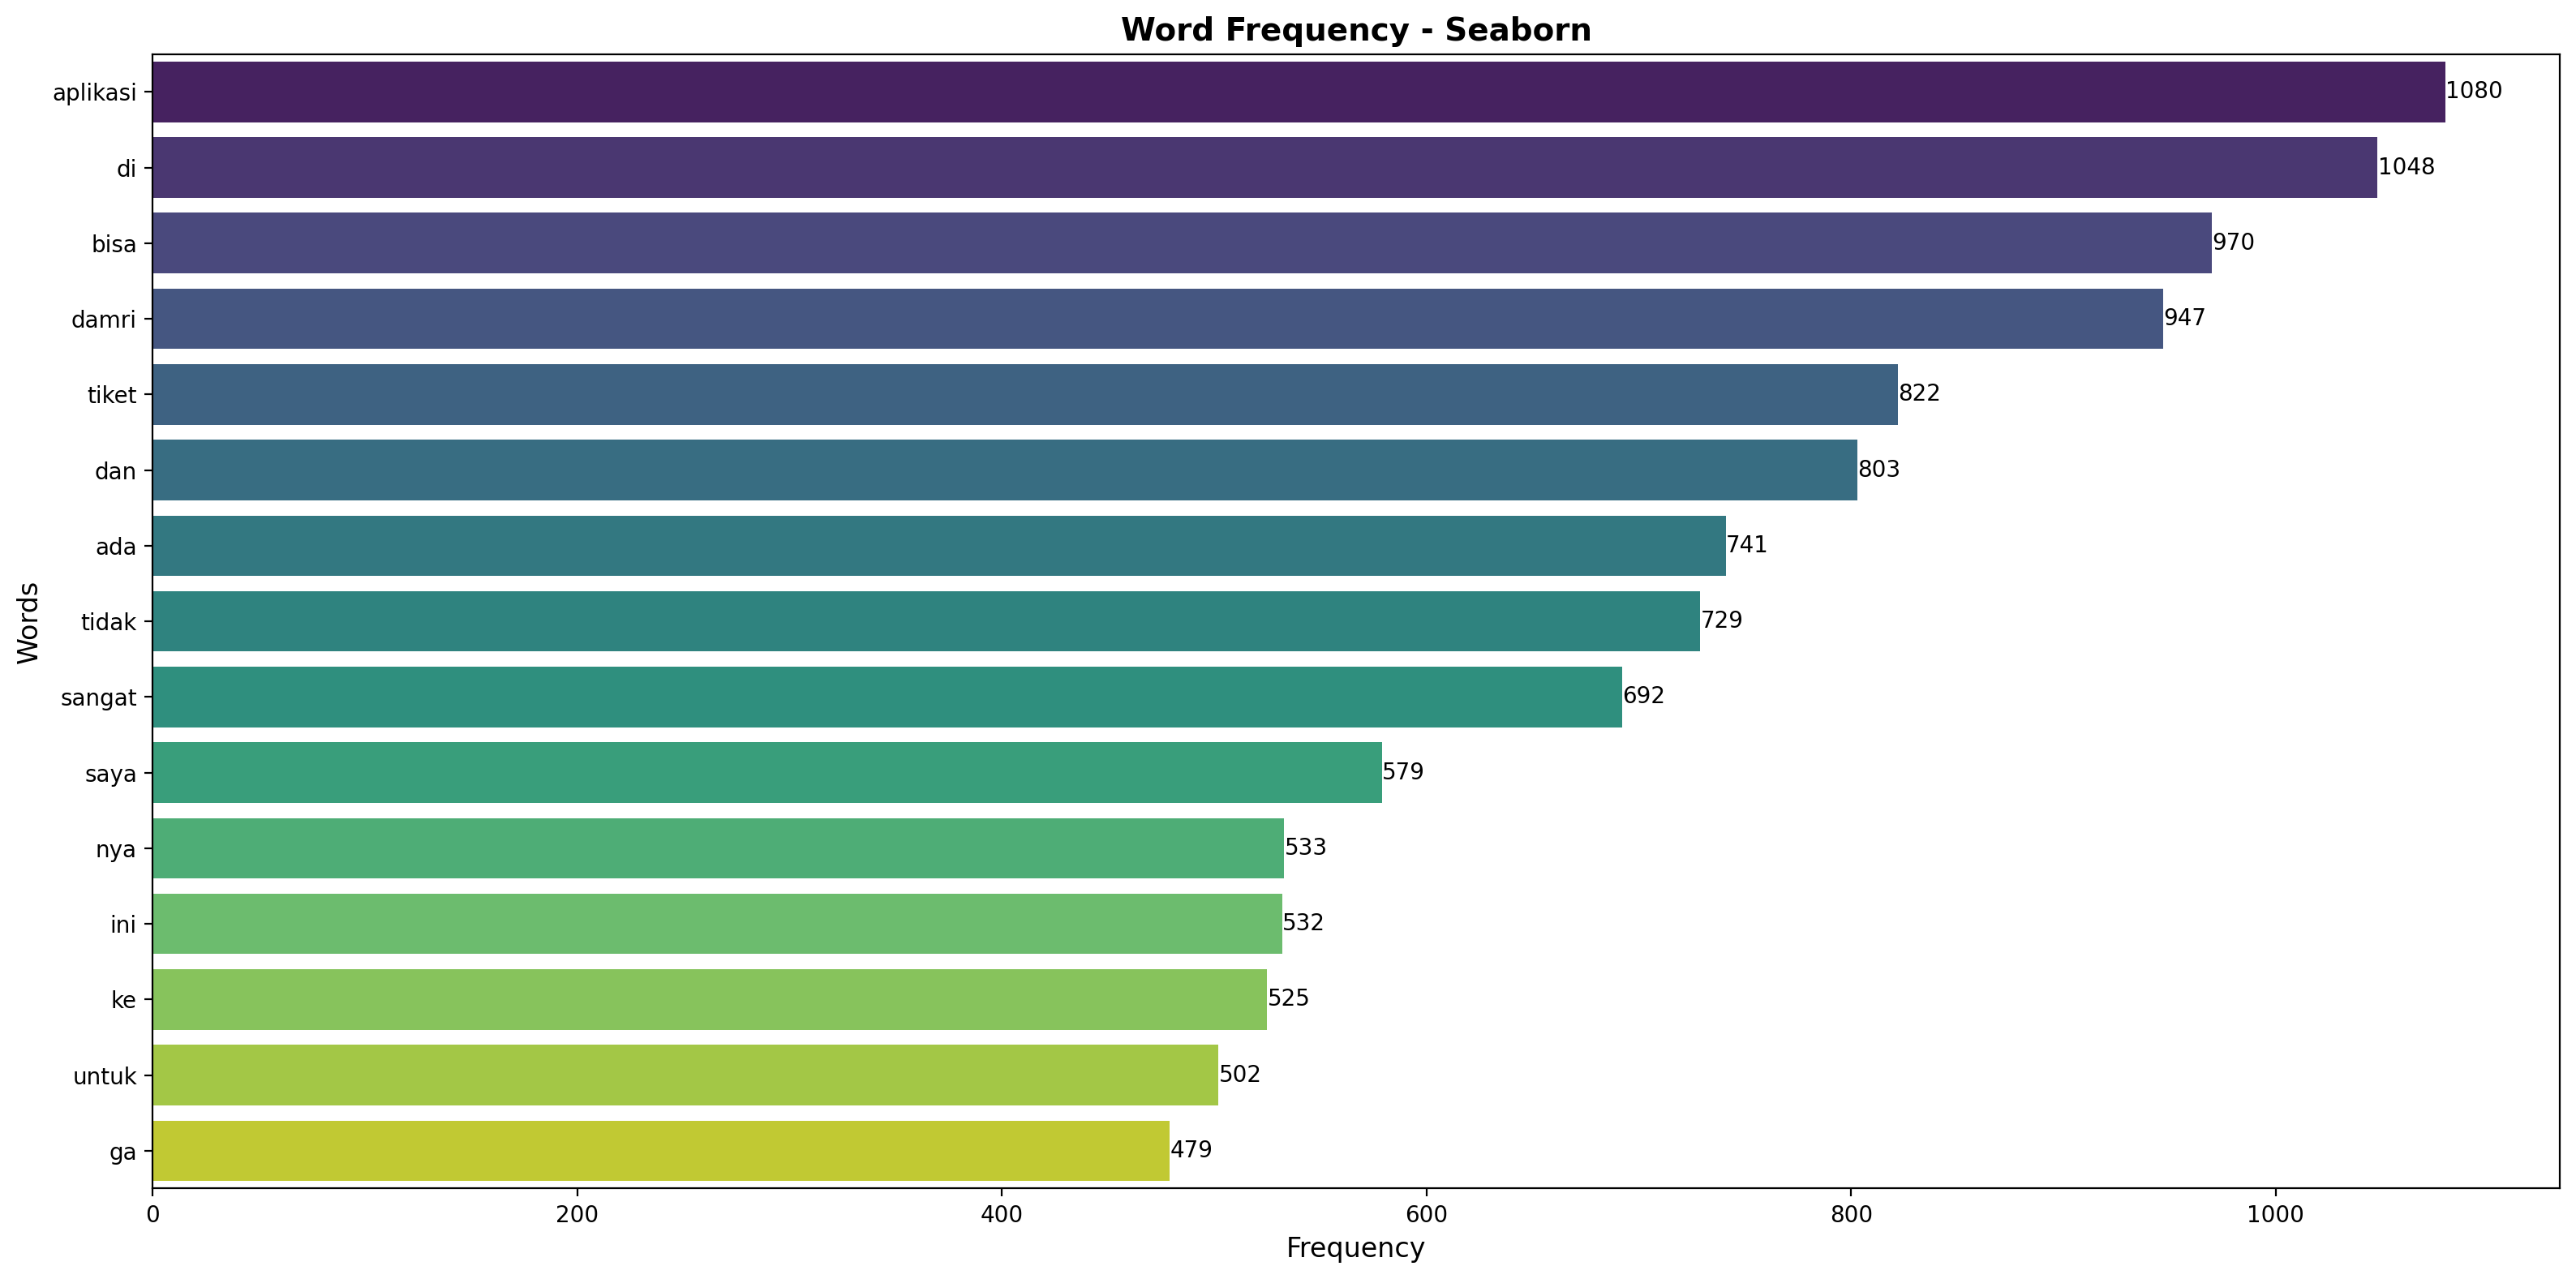

In [13]:

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(16, 8))


# Seaborn horizontal bar chart
sns.barplot(data=df, x='Frequency', y='Word', ax=ax, palette='viridis')
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.set_title('Word Frequency - Seaborn', fontsize=14, fontweight='bold')

# Add frequency values on bars for seaborn plot
for i, v in enumerate(df['Frequency']):
    ax.text(v + 0.1, i, str(v), va='center', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Stemming

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
text = "saya sedang berjalan ke sekolah"
stemmed = stemmer.stem(text)
print("After stemming:", stemmed)

After stemming: saya sedang jalan ke sekolah


In [16]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(stemmer.stem)

### Stopwords Removal

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [18]:
stop_factory = StopWordRemoverFactory()
stop_remover = stop_factory.create_stop_word_remover()
cleaned = stop_remover.remove(stemmed)
print("After stopword removal:", cleaned)

After stopword removal: sedang jalan sekolah


In [19]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(stop_remover.remove)

### Expand Contraction

In [20]:
contraction_regex_dictionary = {
    "\sn?g?ga?k?\s" : " tidak ",
    "\sba?n?ge?t\s" : " banget "
}

In [21]:
def expand_contractions(text: str, contraction_mapping=contraction_regex_dictionary) -> str:
    for regex, replacement in contraction_mapping.items():
        text = re.sub(regex, replacement, " "+text+" ")
    return text.strip()

In [22]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(expand_contractions)

### Final Tokenization

In [23]:
df_damri['tokenized_preprocessed_text'] = df_damri['cleaned_text'].apply(word_tokenize)

### get preprocessed csv

In [24]:
df_damri = df_damri[['content', 'cleaned_text', 'tokenized_raw_text', 'tokenized_preprocessed_text', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']]

In [25]:
df_damri.to_csv("../data/damri_apps_preprocessed.csv", index=False)